## This notebook is for displaying example ferengified images

In [114]:
import numpy as np
from astropy.table import Table,Column
from astropy.io import fits
import matplotlib.pyplot as plt
import bz2
import pdb
import warnings
import os.path
%matplotlib inline
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import Image
import ImageOps

import urllib, cStringIO


#get galaxy filename
def image_from_file(objid,z):
    f = 'images/{:d}_simz_{:d}_evo_1.jpg'.format(objid,z)
    img = Image.open(f)

    return img
#function for getting galaxy images
def image_from_url(gal):
    
    pixelsize=0.396
    height=500
    width=500

    scale=2.0*gal['petror90_r']/pixelsize/width
    # form wurl to query SDSS web sevice to generate cutout image
    cutOutImageUrl="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=" + str(gal['RA'])
    cutOutImageUrl += "&dec=" + str(gal['DEC']) + "&scale=""" + str(scale) + "&width=" + str(width)
    cutOutImageUrl += "&height=" + str(height)
    
    file = cStringIO.StringIO(urllib.urlopen(cutOutImageUrl).read())
    img = Image.open(file)    
    return img


In [66]:
data = Table.read('example_galaxies.fits')

In [4]:
pic = Image.open('images/1237650369410826274_simz_3_evo_1.jpg')

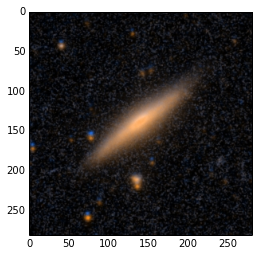

In [5]:
plt.imshow(pic)

In [67]:
data[0]

dr12objid,rowc_r,colc_r,redshift,image_url,RA,DEC,petror90_r
int64,float64,float64,float64,str145,float64,float64,float64
1237651538185879585,247.5342,1326.476,0.01118355,http://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?ra=233.5557&dec=57.28532&scale=0.25&width=512&height=512&opt=GL&query=&Grid=on&Label=on,233.5557,57.28532,6.39936


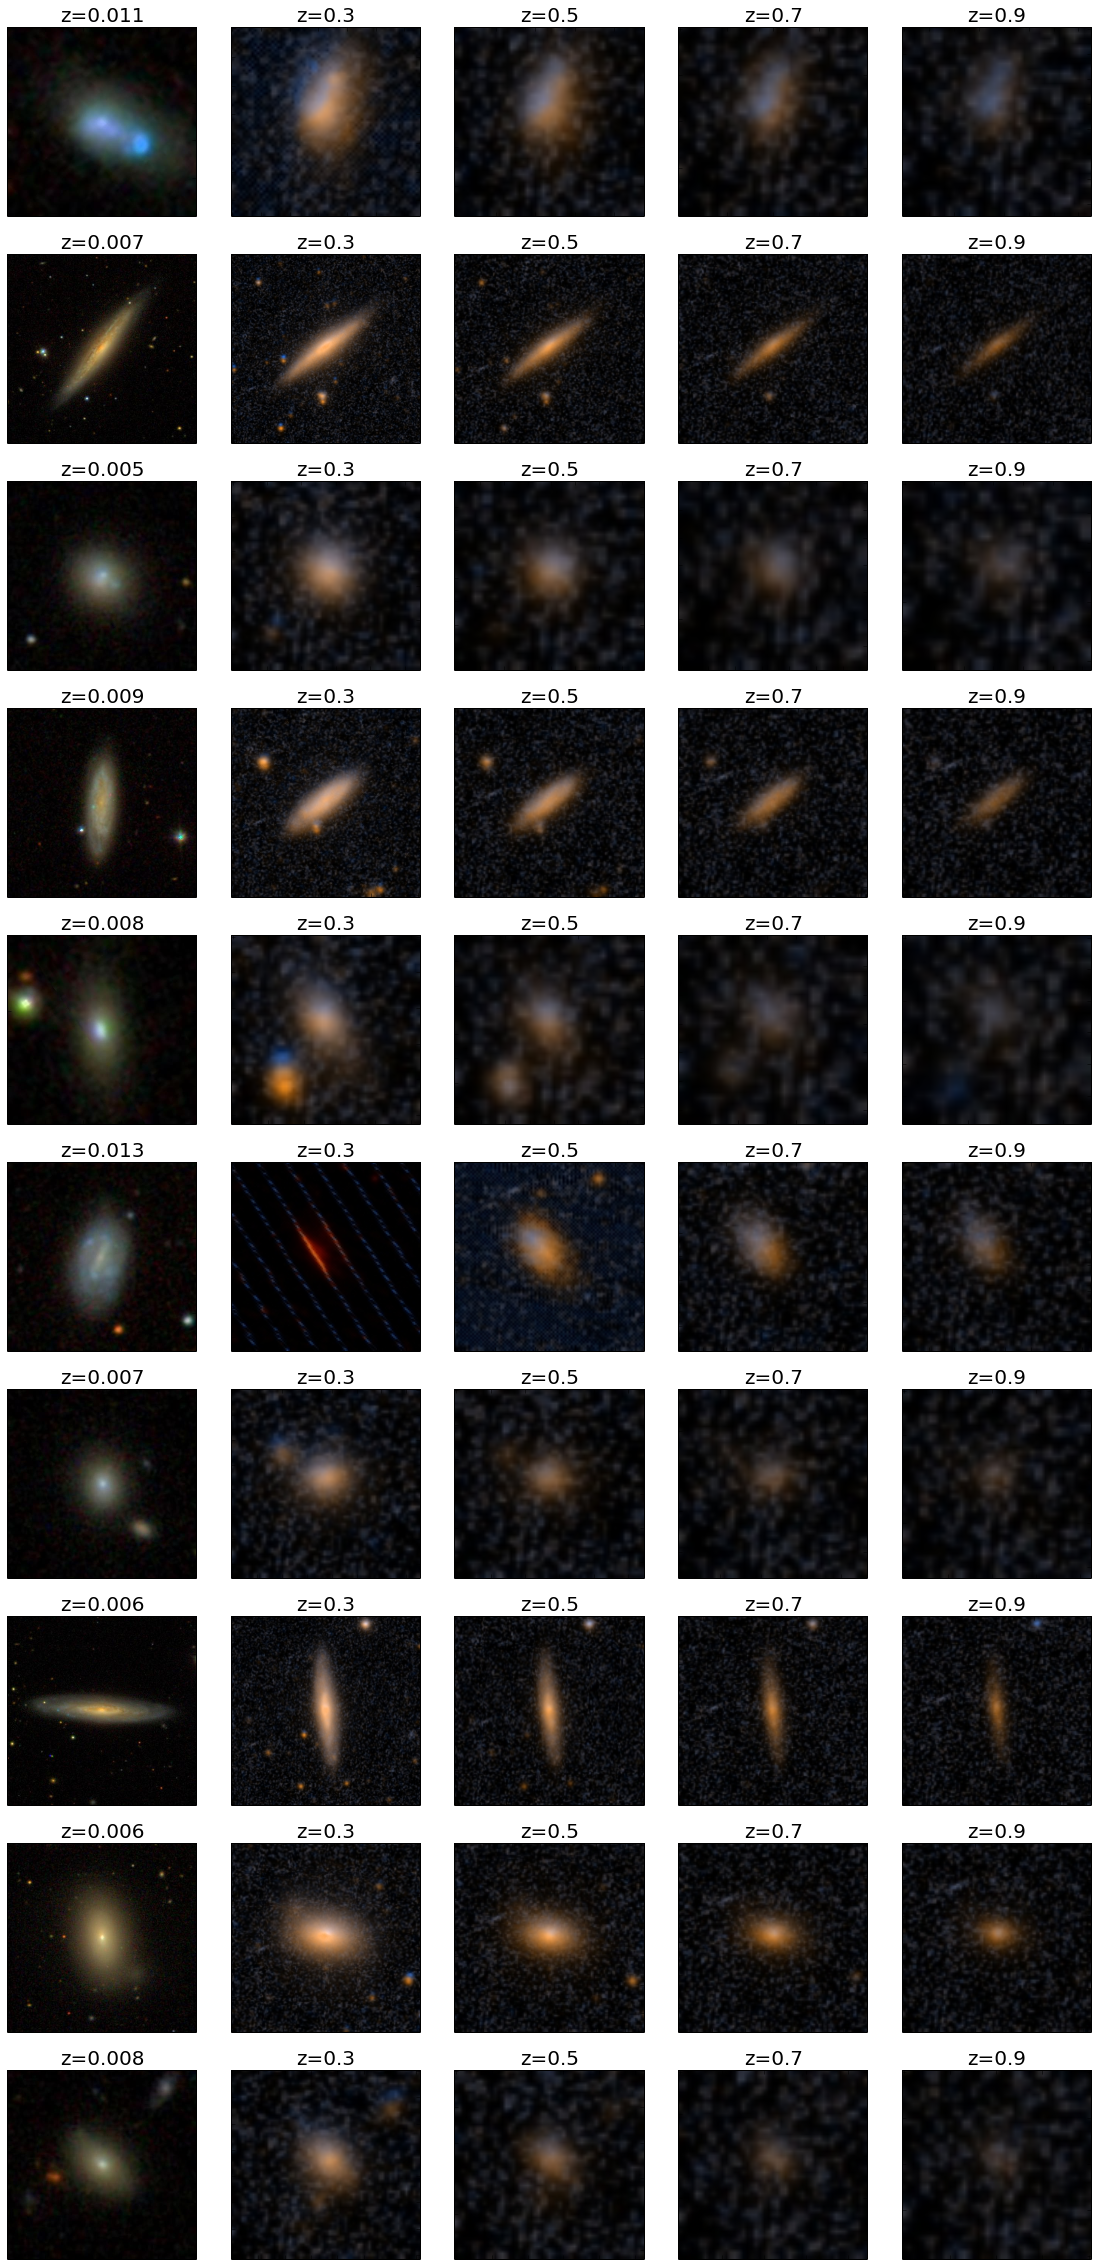

In [139]:
zs = [3,5,7,9]
f = plt.figure(figsize=(20,40))
gs = gridspec.GridSpec(10,5)
gs.update(wspace=0.01)

for j in range(0,10):
    gal = data[j]
    #first cell: original image
    ax = plt.subplot(gs[j,0])
    plt.imshow(image_from_url(gal))

    plt.tick_params(labelleft='off',labelbottom='off')
    plt.title('z={:.3f}'.format(gal['redshift']),fontsize=20)
    plt.gca().invert_xaxis()


    #next: ferengified images at z=0.3, 0.5, 0.7, and 0.9
    for i,z in enumerate(zs):
        ax = plt.subplot(gs[j,i+1])
        plt.imshow(image_from_file(gal['dr12objid'],z))
        plt.tick_params(labelleft='off',labelbottom='off')
        plt.title('z=0.{:d}'.format(z),fontsize=20)

In [69]:
gal

dr12objid,rowc_r,colc_r,redshift,image_url,RA,DEC,petror90_r
int64,float64,float64,float64,str145,float64,float64,float64
1237651538185879585,247.5342,1326.476,0.01118355,http://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?ra=233.5557&dec=57.28532&scale=0.25&width=512&height=512&opt=GL&query=&Grid=on&Label=on,233.5557,57.28532,6.39936


In [72]:
    pixelsize=0.396
    height=500
    width=500

    scale=4.0*gal['petror90_r']/pixelsize/width
    # form wurl to query SDSS web sevice to generate cutout image
    cutOutImageUrl="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=" + str(gal['RA'])
    cutOutImageUrl += "&dec=" + str(gal['DEC']) + "&scale=""" + str(scale) + "&width=" + str(width)
    cutOutImageUrl += "&height=" + str(height)


In [82]:
gal = data[0]

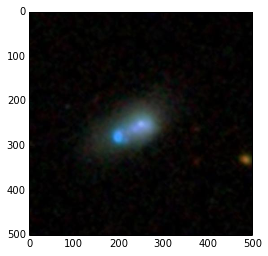

In [85]:
plt.imshow(image_from_url(gal))

In [94]:
image_from_url(gal).T

AttributeError: T